# Wstępne zapoznanie się z danymi i wczytanie bibliotek

In [1]:
# importowanie potrzebnych do zadania bibliotek

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree
from sklearn.model_selection import cross_validate
import plotly.express as px
from math import sqrt

In [2]:
#wczytywanie danych do środowiska, zmiana encodowania w celu naprawy wczytania pliku
data = pd.read_csv('/content/laptop_price.csv', encoding='latin-1')

In [3]:
#wyświetlanie pierwszych linii danych w celu zapoznania się z nimi
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


laptop_ID – identyfikator porządkujący wszystkie laptopy występujące w bazie danych; dane typu: int64

Company – nazwę firmy, która jest producentem laptopa; dane typu: object

Product – nazwa modelu laptopa; dane typu: object

TypeName – rodzaj laptopa; dane typu: object

Inches – rozmiar ekranu laptopa; dane typu: float64

ScreenResolution – rodzaj ekranu użytego w laptopie, rozdzielczość; dane typu: object

Cpu – model procesora laptopa; dane typu: object

Ram – ilość RAMu w laptopie; dane typu: object

Memory – ilość pamięci wbudowanej w laptopa; dane typu: object

Gpu - model karty graficznej użytej w laptopie; dane typu: object

OpSys – system operacyjny zainstalowany na laptopie; dane typu: object

Weight – waga laptopa ; dane typu: object

Price_euros – cena laptopa podana w Euro; dane typu: float64

In [4]:
data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## Wykresy potrzebne do analizy

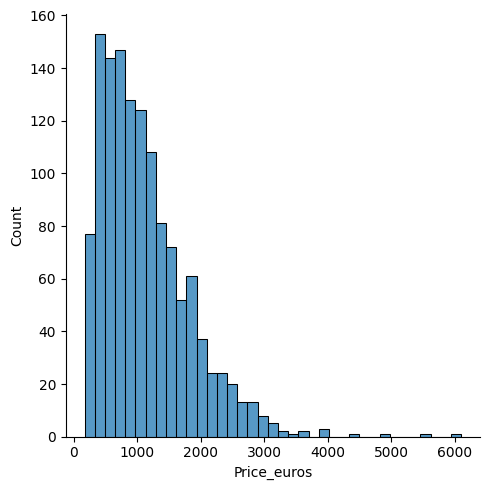

In [6]:
sns.displot(data.Price_euros)

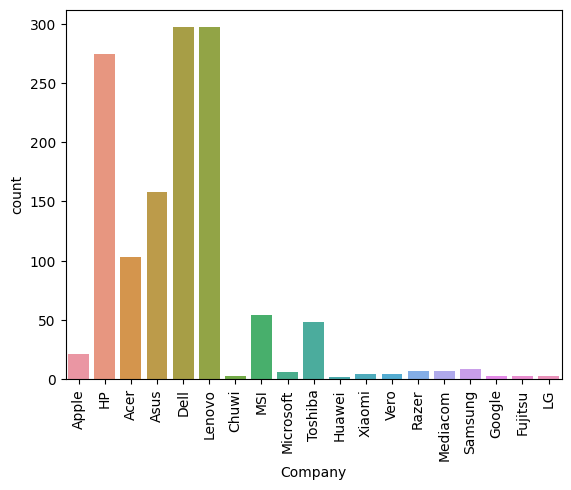

In [7]:
g=sns.countplot(x="Company", data=data)
g.xaxis.set_tick_params(rotation=90)

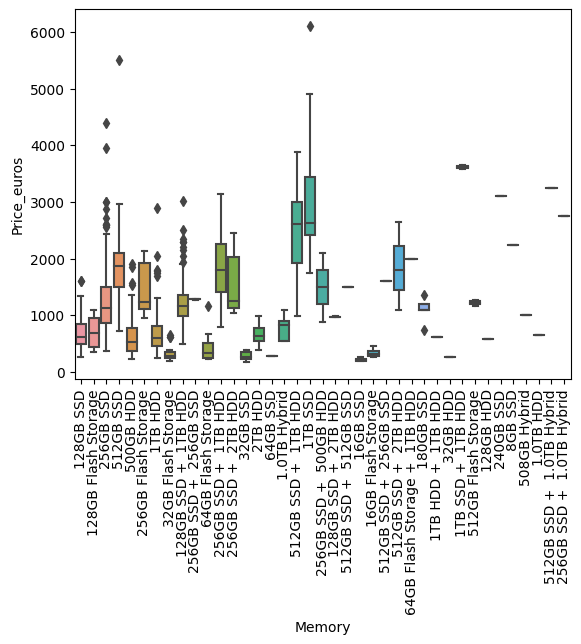

In [8]:
a = sns.boxplot(x='Memory', y='Price_euros', data=data)
a.xaxis.set_tick_params(rotation=90)

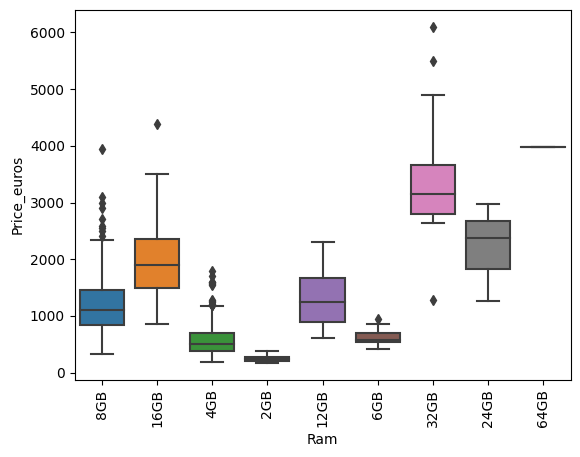

In [9]:
b = sns.boxplot(x='Ram', y='Price_euros', data=data)
b.xaxis.set_tick_params(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

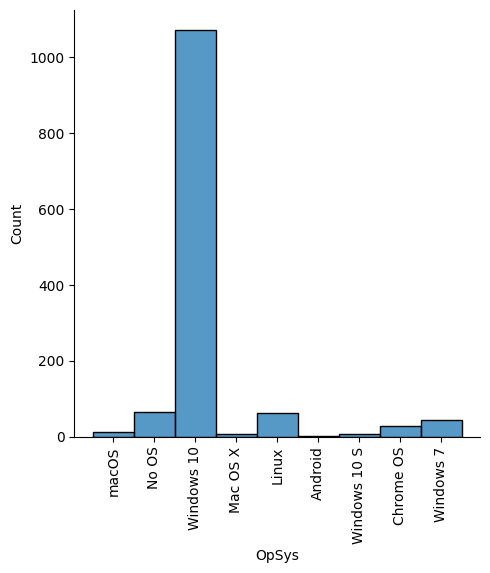

In [10]:
sns.displot(data['OpSys'])
plt.xticks(rotation=90)

# Przygotowanie do modeli predykcyjnych

## Kolumna Ram

In [11]:
data['Ram(GB)'] = data['Ram'].str.replace('GB','')
data['Ram(GB)'] = data['Ram(GB)'].astype(int)

## Kolumna waga

In [12]:
data['Weight(kg)'] = data['Weight'].str.replace('kg','')
data['Weight(kg)'] = data['Weight(kg)'].astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
 13  Ram(GB)           1303 non-null   int64  
 14  Weight(kg)        1303 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 152.8+ KB


In [14]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Ram(GB),Weight(kg)
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,8,1.37
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,8,1.86
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,16,1.83
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,8,1.37


## Kolumna rozdzielczość

<Axes: xlabel='Inches', ylabel='Price_euros'>

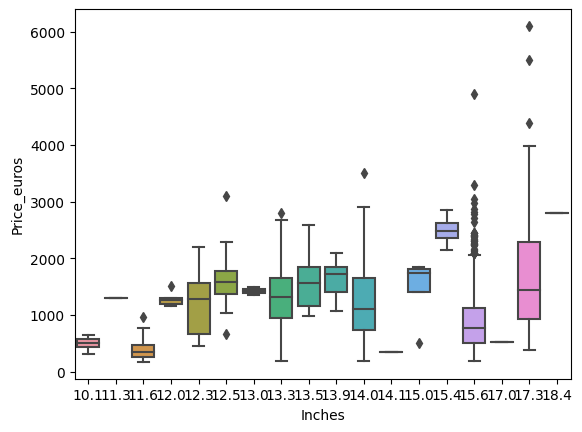

In [15]:
# sprawdzenie czy przekatna ma wplyw na cene

sns.boxplot(x='Inches', y='Price_euros', data=data)

In [16]:
# sprawdzenie wartości unikatowych
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [17]:
# Rozlozenie na nowe kolumny na zero i 1

data['IPS']=data['ScreenResolution'].apply(lambda x:1 if'IPS' in x else 0)
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if'Touchscreen' in x else 0)
data['Ultra HD']=data['ScreenResolution'].apply(lambda x:1 if'4K Ultra HD' in x else 0)
data['Full HD']=data['ScreenResolution'].apply(lambda x:1 if'Full HD' in x else 0)
data['Retina Display']=data['ScreenResolution'].apply(lambda x:1 if'Retina Display' in x else 0)
data['Quad HD+']=data['ScreenResolution'].apply(lambda x:1 if'Quad HD+' in x else 0)

In [18]:
# unormalizoqwanie nazw, pozbycie sie bialych znakow
data.rename(columns={'Ultra HD': 'Ultra_hd', 'Full HD': 'Full_HD', 'Retina Display': 'Retina_Display', 'Quad HD+': 'Quad_HD'})

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_euros,Ram(GB),Weight(kg),IPS,Touchscreen,Ultra_hd,Full_HD,Retina_Display,Quad_HD
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,1.37kg,1339.69,8,1.37,1,0,0,0,1,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,1.34kg,898.94,8,1.34,0,0,0,0,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,1.86kg,575.00,8,1.86,0,0,0,1,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,1.83kg,2537.45,16,1.83,1,0,0,0,1,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,1.37kg,1803.60,8,1.37,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,...,1.8kg,638.00,4,1.80,1,1,0,1,0,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,...,1.3kg,1499.00,16,1.30,1,1,0,0,0,1
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,...,1.5kg,229.00,2,1.50,0,0,0,0,0,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,...,2.19kg,764.00,6,2.19,0,0,0,0,0,0


In [19]:
# wyciagnie rozdzielczości, poprzez uzycie x jako separatora

res_split_1=data['ScreenResolution'].str.split('x', expand=True)
res_split_1

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [20]:
# przypisanie kolumny z jedna wartością na nową do naszego zbioru danych

data['resolution_Y']=res_split_1[1]
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Price_euros,Ram(GB),Weight(kg),IPS,Touchscreen,Ultra HD,Full HD,Retina Display,Quad HD+,resolution_Y
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,1339.69,8,1.37,1,0,0,0,1,0,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,898.94,8,1.34,0,0,0,0,0,0,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,575.00,8,1.86,0,0,0,1,0,0,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,2537.45,16,1.83,1,0,0,0,1,0,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,1803.60,8,1.37,1,0,0,0,1,0,1600


In [21]:
# wyjęcie osatnich 4 znakoów ze splita_1

res_split_2 = res_split_1[0]
[x[-4:] for x in res_split_2]

['2560',
 '1440',
 '1920',
 '2880',
 '2560',
 '1366',
 '2880',
 '1440',
 '1920',
 '1920',
 '1366',
 '1920',
 '2880',
 '1920',
 '2304',
 '2560',
 '1920',
 '2880',
 '1920',
 '1920',
 '1366',
 '1920',
 '1366',
 '1920',
 '1920',
 '1366',
 '1440',
 '1920',
 '1920',
 '1920',
 '1920',
 '1366',
 '1920',
 '3200',
 '1440',
 '1366',
 '1366',
 '1920',
 '1366',
 '1920',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '2560',
 '1366',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1366',
 '1366',
 '1920',
 '1920',
 '2256',
 '1920',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '2304',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '2256',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 

In [22]:
# przypisanie do zbioru danych 

data['resolution_X'] = [x[-4:] for x in res_split_2]

In [23]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Ram(GB),Weight(kg),IPS,Touchscreen,Ultra HD,Full HD,Retina Display,Quad HD+,resolution_Y,resolution_X
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,8,1.37,1,0,0,0,1,0,1600,2560
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,8,1.34,0,0,0,0,0,0,900,1440
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,8,1.86,0,0,0,1,0,0,1080,1920
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,16,1.83,1,0,0,0,1,0,1800,2880
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,8,1.37,1,0,0,0,1,0,1600,2560


In [24]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [25]:
data['resolution_X'] = data['resolution_X'].astype(float)
data['resolution_Y'] = data['resolution_Y'].astype(float)

###Obliczanie gęstości pikseli
Wystarczy, że znamy:

rozdzielczość ekranu (np. 720x1280px),
wielkość (przekątną) ekranu (np. 5" (cali) );
1. podnosimy do kwadratu zarówno wysokość, jak i szerokość ekranu
2. Sumujemy obie wyżej uzyskane liczby
3. Wyciągamy pierwiastek kwadratowy z wyżej uzyskanej liczby
4. Dzielimy uzyskany wynik przez przekątną ekranu w calach

In [26]:
data['Pixels_for_1_inch'] = (((data['resolution_X'] ** 2) + (data['resolution_Y'] ** 2))**0.5 / data['Inches']).astype(float)

In [27]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight(kg),IPS,Touchscreen,Ultra HD,Full HD,Retina Display,Quad HD+,resolution_Y,resolution_X,Pixels_for_1_inch
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,1.37,1,0,0,0,1,0,1600.0,2560.0,226.983005
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,1.34,0,0,0,0,0,0,900.0,1440.0,127.677940
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,1.86,0,0,0,1,0,0,1080.0,1920.0,141.211998
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,1.83,1,0,0,0,1,0,1800.0,2880.0,220.534624
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,1.37,1,0,0,0,1,0,1600.0,2560.0,226.983005


In [28]:
# usuwanie niepotrzebnych kolumn ze zbioru

data.drop(columns=['ScreenResolution', 'laptop_ID', 'Product', 'Ram', 'Weight'], inplace=True)

In [29]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [30]:
data.head()

,Company,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,Ram(GB),Weight(kg),IPS,Touchscreen,Ultra HD,Full HD,Retina Display,Quad HD+,resolution_Y,resolution_X,Pixels_for_1_inch
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,1,0,0,0,1,0,1600.0,2560.0,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,8,1.34,0,0,0,0,0,0,900.0,1440.0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,8,1.86,0,0,0,1,0,0,1080.0,1920.0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16,1.83,1,0,0,0,1,0,1800.0,2880.0,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,1,0,0,0,1,0,1600.0,2560.0,226.983005


## Kolumna Memory

In [31]:
# normalizowanie nazwy pod dalsze podzialy kolumn

data['Memory'] = data['Memory'].str.replace('Flash Storage','Flash_Storage')

In [32]:
data['Memory'].unique()

array(['128GB SSD', '128GB Flash_Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash_Storage', '1TB HDD',
       '32GB Flash_Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash_Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash_Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash_Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash_Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [33]:
# rozdzielenie kolumny z pamięcią

memory_split_1 = data['Memory'].str.split(' ', expand=True)

data['1st_drive_size'] = memory_split_1[0]
data['1st_drive_type'] = memory_split_1[1]
data['2nd_drive_size'] = memory_split_1[4]
data['2nd_drive_type'] = memory_split_1[5]

In [34]:
data.head()

,Company,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,Ram(GB),Weight(kg),...,Full HD,Retina Display,Quad HD+,resolution_Y,resolution_X,Pixels_for_1_inch,1st_drive_size,1st_drive_type,2nd_drive_size,2nd_drive_type
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,...,0,1,0,1600.0,2560.0,226.983005,128GB,SSD,None,None
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash_Storage,Intel HD Graphics 6000,macOS,898.94,8,1.34,...,0,0,0,900.0,1440.0,127.677940,128GB,Flash_Storage,None,None
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,8,1.86,...,1,0,0,1080.0,1920.0,141.211998,256GB,SSD,None,None
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16,1.83,...,0,1,0,1800.0,2880.0,220.534624,512GB,SSD,None,None
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,...,0,1,0,1600.0,2560.0,226.983005,256GB,SSD,None,None


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Cpu                1303 non-null   object 
 4   Memory             1303 non-null   object 
 5   Gpu                1303 non-null   object 
 6   OpSys              1303 non-null   object 
 7   Price_euros        1303 non-null   float64
 8   Ram(GB)            1303 non-null   int64  
 9   Weight(kg)         1303 non-null   float64
 10  IPS                1303 non-null   int64  
 11  Touchscreen        1303 non-null   int64  
 12  Ultra HD           1303 non-null   int64  
 13  Full HD            1303 non-null   int64  
 14  Retina Display     1303 non-null   int64  
 15  Quad HD+           1303 non-null   int64  
 16  resolution_Y       1303 

In [36]:

data['1st_drive_size'].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [37]:
# Pętla zamieniająca nam dane z TB na GB

data['1st_drive_size'] = data['1st_drive_size'].str.replace('GB','')
for i in range(len(data['1st_drive_size'])):
    string = data['1st_drive_size'][i]
    moded_string = ""
    if 'TB' in string:
        for j in range(len(string) - 2):
            moded_string = moded_string + string[j]
        moded_string = float(moded_string)
        moded_string = moded_string * 1000
        data['1st_drive_size'][i] = moded_string

<ipython-input-37-f038226c6291>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['1st_drive_size'][i] = moded_string


In [38]:
# zamiana NaN na np.nan
data['2nd_drive_size']=data['2nd_drive_size'].fillna(value=np.nan)
# zamiana np.nan na 0, a pozniej na string
data['2nd_drive_size']=data['2nd_drive_size'].replace(np.nan, 0).astype(str)
# aby poprawnie były odczytywane dane z daszej bazy danych

In [39]:
data.head()

,Company,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,Ram(GB),Weight(kg),...,Full HD,Retina Display,Quad HD+,resolution_Y,resolution_X,Pixels_for_1_inch,1st_drive_size,1st_drive_type,2nd_drive_size,2nd_drive_type
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,...,0,1,0,1600.0,2560.0,226.983005,128,SSD,0,None
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash_Storage,Intel HD Graphics 6000,macOS,898.94,8,1.34,...,0,0,0,900.0,1440.0,127.677940,128,Flash_Storage,0,None
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,8,1.86,...,1,0,0,1080.0,1920.0,141.211998,256,SSD,0,None
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16,1.83,...,0,1,0,1800.0,2880.0,220.534624,512,SSD,0,None
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,...,0,1,0,1600.0,2560.0,226.983005,256,SSD,0,None


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Cpu                1303 non-null   object 
 4   Memory             1303 non-null   object 
 5   Gpu                1303 non-null   object 
 6   OpSys              1303 non-null   object 
 7   Price_euros        1303 non-null   float64
 8   Ram(GB)            1303 non-null   int64  
 9   Weight(kg)         1303 non-null   float64
 10  IPS                1303 non-null   int64  
 11  Touchscreen        1303 non-null   int64  
 12  Ultra HD           1303 non-null   int64  
 13  Full HD            1303 non-null   int64  
 14  Retina Display     1303 non-null   int64  
 15  Quad HD+           1303 non-null   int64  
 16  resolution_Y       1303 

In [41]:
data['2nd_drive_size'].unique()

array(['0', '1TB', '256GB', '2TB', '500GB', '512GB', '1.0TB'],
      dtype=object)

In [42]:
# użycie tej samej funkcji co wcześniej

data['2nd_drive_size'] = data['2nd_drive_size'].str.replace('GB','')
for i in range(len(data['2nd_drive_size'])):
    string = data['2nd_drive_size'][i] # [i] - 
    moded_string = ""
    if 'TB' in string:
        for j in range(len(string) - 2):
            moded_string = moded_string + string[j]
        moded_string = float(moded_string)
        moded_string = moded_string * 1000
        data['2nd_drive_size'][i] = moded_string

<ipython-input-42-3569d7c33399>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['2nd_drive_size'][i] = moded_string


In [43]:
data['2nd_drive_size'].unique()

array(['0', 1000.0, '256', 2000.0, '500', '512'], dtype=object)

In [44]:
data.head()

,Company,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,Ram(GB),Weight(kg),...,Full HD,Retina Display,Quad HD+,resolution_Y,resolution_X,Pixels_for_1_inch,1st_drive_size,1st_drive_type,2nd_drive_size,2nd_drive_type
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,...,0,1,0,1600.0,2560.0,226.983005,128,SSD,0,None
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash_Storage,Intel HD Graphics 6000,macOS,898.94,8,1.34,...,0,0,0,900.0,1440.0,127.677940,128,Flash_Storage,0,None
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,8,1.86,...,1,0,0,1080.0,1920.0,141.211998,256,SSD,0,None
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16,1.83,...,0,1,0,1800.0,2880.0,220.534624,512,SSD,0,None
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,...,0,1,0,1600.0,2560.0,226.983005,256,SSD,0,None


In [45]:
data['1st_drive_type'].unique()

array(['SSD', 'Flash_Storage', 'HDD', 'Hybrid'], dtype=object)

In [46]:
# Tworzenie tablicy 0 i 1 na podstawie wcześniej stwrzonego DataFrame "_type", dołączanie jej do zbioru danych z odpowiednim prefixem, axis laczy po kolumnach

data = pd.concat([data, pd.get_dummies(data['2nd_drive_type'], prefix='2nd_drive_type')], axis=1)

In [47]:
data = pd.concat([data, pd.get_dummies(data['1st_drive_type'], prefix='1st_drive_type')], axis=1)

In [48]:
data.head()

,Company,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,Ram(GB),Weight(kg),...,1st_drive_type,2nd_drive_size,2nd_drive_type,2nd_drive_type_HDD,2nd_drive_type_Hybrid,2nd_drive_type_SSD,1st_drive_type_Flash_Storage,1st_drive_type_HDD,1st_drive_type_Hybrid,1st_drive_type_SSD
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,...,SSD,0,None,0,0,0,0,0,0,1
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash_Storage,Intel HD Graphics 6000,macOS,898.94,8,1.34,...,Flash_Storage,0,None,0,0,0,1,0,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,8,1.86,...,SSD,0,None,0,0,0,0,0,0,1
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16,1.83,...,SSD,0,None,0,0,0,0,0,0,1
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,...,SSD,0,None,0,0,0,0,0,0,1


In [49]:
# usuniecięcie niepotrzbenych danych

data.drop(columns=['1st_drive_type', '2nd_drive_type', 'Memory'], inplace=True)

In [50]:
data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

## Podział pozostałych danych z kolumn 

In [51]:
# podział reszty danych 0 i 1

data = pd.concat([data, pd.get_dummies(data['Company'], prefix='Comapny')], axis=1)

In [52]:
data = pd.concat([data, pd.get_dummies(data['TypeName'], prefix='TypeName')], axis=1)

In [53]:
data = pd.concat([data, pd.get_dummies(data['OpSys'], prefix='OpSys')], axis=1)

In [54]:
# zmiana formatu na int

data['1st_drive_size'] = data['1st_drive_size'].astype(int)
data['2nd_drive_size'] = data['2nd_drive_size'].astype(int)

In [55]:
# usuwanie niepotrzebnych kolumn

data.drop(columns=['Company', 'TypeName'], inplace=True)

In [56]:
data.drop(columns=['OpSys'], inplace=True)

In [57]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

## Kolumna CPU

In [58]:
# wyciągniecie z CPU z konća GHz

GHz_values = []
for value in data['Cpu']:
    GHz_value = value.split()[-1]
    GHz_values.append(GHz_value)

data['GHz'] = GHz_values

In [59]:
data.head()

,Inches,Cpu,Gpu,Price_euros,Ram(GB),Weight(kg),IPS,Touchscreen,Ultra HD,Full HD,...,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,GHz
0,13.3,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,1339.69,8,1.37,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2.3GHz
1,13.3,Intel Core i5 1.8GHz,Intel HD Graphics 6000,898.94,8,1.34,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.8GHz
2,15.6,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,575.00,8,1.86,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.5GHz
3,15.4,Intel Core i7 2.7GHz,AMD Radeon Pro 455,2537.45,16,1.83,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2.7GHz
4,13.3,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,1803.60,8,1.37,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3.1GHz


In [60]:
data['GHz'] = data['GHz'].str.replace('GHz', '').astype(float)

In [61]:
data.head()

,Inches,Cpu,Gpu,Price_euros,Ram(GB),Weight(kg),IPS,Touchscreen,Ultra HD,Full HD,...,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,GHz
0,13.3,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,1339.69,8,1.37,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2.3
1,13.3,Intel Core i5 1.8GHz,Intel HD Graphics 6000,898.94,8,1.34,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.8
2,15.6,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,575.00,8,1.86,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.5
3,15.4,Intel Core i7 2.7GHz,AMD Radeon Pro 455,2537.45,16,1.83,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2.7
4,13.3,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,1803.60,8,1.37,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3.1


In [62]:
# oddzielenie rodzaju procesora od GHz

cpu_values = []
for value in data['Cpu']:
    cpu_value = value.split()[:-1]
    cpu_values.append(cpu_value)

data['Cpu_type'] = cpu_values

In [63]:
data.drop(columns='Cpu', inplace=True)

In [64]:
data['Cpu_type'] = data['Cpu_type'].astype(str)

In [65]:
data.head()

,Inches,Gpu,Price_euros,Ram(GB),Weight(kg),IPS,Touchscreen,Ultra HD,Full HD,Retina Display,...,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,GHz,Cpu_type
0,13.3,Intel Iris Plus Graphics 640,1339.69,8,1.37,1,0,0,0,1,...,0,0,0,0,0,0,0,1,2.3,"['Intel', 'Core', 'i5']"
1,13.3,Intel HD Graphics 6000,898.94,8,1.34,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.8,"['Intel', 'Core', 'i5']"
2,15.6,Intel HD Graphics 620,575.00,8,1.86,0,0,0,1,0,...,0,0,0,1,0,0,0,0,2.5,"['Intel', 'Core', 'i5', '7200U']"
3,15.4,AMD Radeon Pro 455,2537.45,16,1.83,1,0,0,0,1,...,0,0,0,0,0,0,0,1,2.7,"['Intel', 'Core', 'i7']"
4,13.3,Intel Iris Plus Graphics 650,1803.60,8,1.37,1,0,0,0,1,...,0,0,0,0,0,0,0,1,3.1,"['Intel', 'Core', 'i5']"


In [66]:
data = pd.concat([data, pd.get_dummies(data['Cpu_type'], prefix='Cpu_type')], axis=1)

## Kolumna GPU

In [67]:
data = pd.concat([data, pd.get_dummies(data['Gpu'], prefix='Gpu')], axis=1)

In [68]:
data.drop(columns='Cpu_type', inplace=True)

In [69]:
data.head()

,Inches,Gpu,Price_euros,Ram(GB),Weight(kg),IPS,Touchscreen,Ultra HD,Full HD,Retina Display,...,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M
0,13.3,Intel Iris Plus Graphics 640,1339.69,8,1.37,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,13.3,Intel HD Graphics 6000,898.94,8,1.34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.6,Intel HD Graphics 620,575.00,8,1.86,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,15.4,AMD Radeon Pro 455,2537.45,16,1.83,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,13.3,Intel Iris Plus Graphics 650,1803.60,8,1.37,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [71]:
data.drop(columns=['Gpu'], inplace=True)

In [72]:
data.head()

,Inches,Price_euros,Ram(GB),Weight(kg),IPS,Touchscreen,Ultra HD,Full HD,Retina Display,Quad HD+,...,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M
0,13.3,1339.69,8,1.37,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,13.3,898.94,8,1.34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.6,575.00,8,1.86,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.4,2537.45,16,1.83,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,13.3,1803.60,8,1.37,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Ostateczna prezentacja DataFrame

In [73]:
# wyświetlanie wszystkich kolumn

pd.set_option('display.max_columns', None)

In [74]:
data.columns.tolist()

['Inches',
 'Price_euros',
 'Ram(GB)',
 'Weight(kg)',
 'IPS',
 'Touchscreen',
 'Ultra HD',
 'Full HD',
 'Retina Display',
 'Quad HD+',
 'resolution_Y',
 'resolution_X',
 'Pixels_for_1_inch',
 '1st_drive_size',
 '2nd_drive_size',
 '2nd_drive_type_HDD',
 '2nd_drive_type_Hybrid',
 '2nd_drive_type_SSD',
 '1st_drive_type_Flash_Storage',
 '1st_drive_type_HDD',
 '1st_drive_type_Hybrid',
 '1st_drive_type_SSD',
 'Comapny_Acer',
 'Comapny_Apple',
 'Comapny_Asus',
 'Comapny_Chuwi',
 'Comapny_Dell',
 'Comapny_Fujitsu',
 'Comapny_Google',
 'Comapny_HP',
 'Comapny_Huawei',
 'Comapny_LG',
 'Comapny_Lenovo',
 'Comapny_MSI',
 'Comapny_Mediacom',
 'Comapny_Microsoft',
 'Comapny_Razer',
 'Comapny_Samsung',
 'Comapny_Toshiba',
 'Comapny_Vero',
 'Comapny_Xiaomi',
 'TypeName_2 in 1 Convertible',
 'TypeName_Gaming',
 'TypeName_Netbook',
 'TypeName_Notebook',
 'TypeName_Ultrabook',
 'TypeName_Workstation',
 'OpSys_Android',
 'OpSys_Chrome OS',
 'OpSys_Linux',
 'OpSys_Mac OS X',
 'OpSys_No OS',
 'OpSys_Windows

# Model predykcyjny

In [75]:
# Inicjalizacja dnaych do modelu predykcyjnego

X = data[['Inches',
 'Ram(GB)',
 'Weight(kg)',
 'IPS',
 'Touchscreen',
 'Ultra HD',
 'Full HD',
 'Retina Display',
 'Quad HD+',
 'resolution_Y',
 'resolution_X',
 'Pixels_for_1_inch',
 '1st_drive_size',
 '2nd_drive_size',
 '2nd_drive_type_HDD',
 '2nd_drive_type_Hybrid',
 '2nd_drive_type_SSD',
 '1st_drive_type_Flash_Storage',
 '1st_drive_type_HDD',
 '1st_drive_type_Hybrid',
 '1st_drive_type_SSD',
 'Comapny_Acer',
 'Comapny_Apple',
 'Comapny_Asus',
 'Comapny_Chuwi',
 'Comapny_Dell',
 'Comapny_Fujitsu',
 'Comapny_Google',
 'Comapny_HP',
 'Comapny_Huawei',
 'Comapny_LG',
 'Comapny_Lenovo',
 'Comapny_MSI',
 'Comapny_Mediacom',
 'Comapny_Microsoft',
 'Comapny_Razer',
 'Comapny_Samsung',
 'Comapny_Toshiba',
 'Comapny_Vero',
 'Comapny_Xiaomi',
 'TypeName_2 in 1 Convertible',
 'TypeName_Gaming',
 'TypeName_Netbook',
 'TypeName_Notebook',
 'TypeName_Ultrabook',
 'TypeName_Workstation',
 'OpSys_Android',
 'OpSys_Chrome OS',
 'OpSys_Linux',
 'OpSys_Mac OS X',
 'OpSys_No OS',
 'OpSys_Windows 10',
 'OpSys_Windows 10 S',
 'OpSys_Windows 7',
 'OpSys_macOS',
 'GHz',
 "Cpu_type_['AMD', 'A10-Series', '9600P']",
 "Cpu_type_['AMD', 'A10-Series', '9620P']",
 "Cpu_type_['AMD', 'A10-Series', 'A10-9620P']",
 "Cpu_type_['AMD', 'A12-Series', '9700P']",
 "Cpu_type_['AMD', 'A12-Series', '9720P']",
 "Cpu_type_['AMD', 'A4-Series', '7210']",
 "Cpu_type_['AMD', 'A6-Series', '7310']",
 "Cpu_type_['AMD', 'A6-Series', '9220']",
 "Cpu_type_['AMD', 'A6-Series', 'A6-9220']",
 "Cpu_type_['AMD', 'A8-Series', '7410']",
 "Cpu_type_['AMD', 'A9-Series', '9410']",
 "Cpu_type_['AMD', 'A9-Series', '9420']",
 "Cpu_type_['AMD', 'A9-Series', 'A9-9420']",
 "Cpu_type_['AMD', 'E-Series', '6110']",
 "Cpu_type_['AMD', 'E-Series', '7110']",
 "Cpu_type_['AMD', 'E-Series', '9000']",
 "Cpu_type_['AMD', 'E-Series', '9000e']",
 "Cpu_type_['AMD', 'E-Series', 'E2-6110']",
 "Cpu_type_['AMD', 'E-Series', 'E2-9000']",
 "Cpu_type_['AMD', 'E-Series', 'E2-9000e']",
 "Cpu_type_['AMD', 'FX', '8800P']",
 "Cpu_type_['AMD', 'FX', '9830P']",
 "Cpu_type_['AMD', 'Ryzen', '1600']",
 "Cpu_type_['AMD', 'Ryzen', '1700']",
 "Cpu_type_['Intel', 'Atom', 'X5-Z8350']",
 "Cpu_type_['Intel', 'Atom', 'Z8350']",
 "Cpu_type_['Intel', 'Atom', 'x5-Z8300']",
 "Cpu_type_['Intel', 'Atom', 'x5-Z8350']",
 "Cpu_type_['Intel', 'Atom', 'x5-Z8550']",
 "Cpu_type_['Intel', 'Celeron', 'Dual', 'Core', '3205U']",
 "Cpu_type_['Intel', 'Celeron', 'Dual', 'Core', '3855U']",
 "Cpu_type_['Intel', 'Celeron', 'Dual', 'Core', 'N3050']",
 "Cpu_type_['Intel', 'Celeron', 'Dual', 'Core', 'N3060']",
 "Cpu_type_['Intel', 'Celeron', 'Dual', 'Core', 'N3350']",
 "Cpu_type_['Intel', 'Celeron', 'Quad', 'Core', 'N3160']",
 "Cpu_type_['Intel', 'Celeron', 'Quad', 'Core', 'N3450']",
 "Cpu_type_['Intel', 'Celeron', 'Quad', 'Core', 'N3710']",
 "Cpu_type_['Intel', 'Core', 'M', '6Y30']",
 "Cpu_type_['Intel', 'Core', 'M', '6Y54']",
 "Cpu_type_['Intel', 'Core', 'M', '6Y75']",
 "Cpu_type_['Intel', 'Core', 'M', '7Y30']",
 "Cpu_type_['Intel', 'Core', 'M', 'M3-6Y30']",
 "Cpu_type_['Intel', 'Core', 'M', 'M7-6Y75']",
 "Cpu_type_['Intel', 'Core', 'M', 'm3']",
 "Cpu_type_['Intel', 'Core', 'M', 'm3-7Y30']",
 "Cpu_type_['Intel', 'Core', 'M', 'm7-6Y75']",
 "Cpu_type_['Intel', 'Core', 'M']",
 "Cpu_type_['Intel', 'Core', 'i3', '6006U']",
 "Cpu_type_['Intel', 'Core', 'i3', '6100U']",
 "Cpu_type_['Intel', 'Core', 'i3', '7100U']",
 "Cpu_type_['Intel', 'Core', 'i3', '7130U']",
 "Cpu_type_['Intel', 'Core', 'i5', '6200U']",
 "Cpu_type_['Intel', 'Core', 'i5', '6260U']",
 "Cpu_type_['Intel', 'Core', 'i5', '6300HQ']",
 "Cpu_type_['Intel', 'Core', 'i5', '6300U']",
 "Cpu_type_['Intel', 'Core', 'i5', '6440HQ']",
 "Cpu_type_['Intel', 'Core', 'i5', '7200U']",
 "Cpu_type_['Intel', 'Core', 'i5', '7300HQ']",
 "Cpu_type_['Intel', 'Core', 'i5', '7300U']",
 "Cpu_type_['Intel', 'Core', 'i5', '7440HQ']",
 "Cpu_type_['Intel', 'Core', 'i5', '7500U']",
 "Cpu_type_['Intel', 'Core', 'i5', '7Y54']",
 "Cpu_type_['Intel', 'Core', 'i5', '7Y57']",
 "Cpu_type_['Intel', 'Core', 'i5', '8250U']",
 "Cpu_type_['Intel', 'Core', 'i5']",
 "Cpu_type_['Intel', 'Core', 'i7', '6500U']",
 "Cpu_type_['Intel', 'Core', 'i7', '6560U']",
 "Cpu_type_['Intel', 'Core', 'i7', '6600U']",
 "Cpu_type_['Intel', 'Core', 'i7', '6700HQ']",
 "Cpu_type_['Intel', 'Core', 'i7', '6820HK']",
 "Cpu_type_['Intel', 'Core', 'i7', '6820HQ']",
 "Cpu_type_['Intel', 'Core', 'i7', '6920HQ']",
 "Cpu_type_['Intel', 'Core', 'i7', '7500U']",
 "Cpu_type_['Intel', 'Core', 'i7', '7560U']",
 "Cpu_type_['Intel', 'Core', 'i7', '7600U']",
 "Cpu_type_['Intel', 'Core', 'i7', '7660U']",
 "Cpu_type_['Intel', 'Core', 'i7', '7700HQ']",
 "Cpu_type_['Intel', 'Core', 'i7', '7820HK']",
 "Cpu_type_['Intel', 'Core', 'i7', '7820HQ']",
 "Cpu_type_['Intel', 'Core', 'i7', '7Y75']",
 "Cpu_type_['Intel', 'Core', 'i7', '8550U']",
 "Cpu_type_['Intel', 'Core', 'i7', '8650U']",
 "Cpu_type_['Intel', 'Core', 'i7']",
 "Cpu_type_['Intel', 'Pentium', 'Dual', 'Core', '4405U']",
 "Cpu_type_['Intel', 'Pentium', 'Dual', 'Core', '4405Y']",
 "Cpu_type_['Intel', 'Pentium', 'Dual', 'Core', 'N4200']",
 "Cpu_type_['Intel', 'Pentium', 'Quad', 'Core', 'N3700']",
 "Cpu_type_['Intel', 'Pentium', 'Quad', 'Core', 'N3710']",
 "Cpu_type_['Intel', 'Pentium', 'Quad', 'Core', 'N4200']",
 "Cpu_type_['Intel', 'Xeon', 'E3-1505M', 'V6']",
 "Cpu_type_['Intel', 'Xeon', 'E3-1535M', 'v5']",
 "Cpu_type_['Intel', 'Xeon', 'E3-1535M', 'v6']",
 "Cpu_type_['Samsung', 'Cortex', 'A72&A53']",
 'Gpu_AMD FirePro W4190M',
 'Gpu_AMD FirePro W4190M ',
 'Gpu_AMD FirePro W5130M',
 'Gpu_AMD FirePro W6150M',
 'Gpu_AMD R17M-M1-70',
 'Gpu_AMD R4 Graphics',
 'Gpu_AMD Radeon 520',
 'Gpu_AMD Radeon 530',
 'Gpu_AMD Radeon 540',
 'Gpu_AMD Radeon Pro 455',
 'Gpu_AMD Radeon Pro 555',
 'Gpu_AMD Radeon Pro 560',
 'Gpu_AMD Radeon R2',
 'Gpu_AMD Radeon R2 Graphics',
 'Gpu_AMD Radeon R3',
 'Gpu_AMD Radeon R4',
 'Gpu_AMD Radeon R4 Graphics',
 'Gpu_AMD Radeon R5',
 'Gpu_AMD Radeon R5 430',
 'Gpu_AMD Radeon R5 520',
 'Gpu_AMD Radeon R5 M315',
 'Gpu_AMD Radeon R5 M330',
 'Gpu_AMD Radeon R5 M420',
 'Gpu_AMD Radeon R5 M420X',
 'Gpu_AMD Radeon R5 M430',
 'Gpu_AMD Radeon R7',
 'Gpu_AMD Radeon R7 Graphics',
 'Gpu_AMD Radeon R7 M360',
 'Gpu_AMD Radeon R7 M365X',
 'Gpu_AMD Radeon R7 M440',
 'Gpu_AMD Radeon R7 M445',
 'Gpu_AMD Radeon R7 M460',
 'Gpu_AMD Radeon R7 M465',
 'Gpu_AMD Radeon R9 M385',
 'Gpu_AMD Radeon RX 540',
 'Gpu_AMD Radeon RX 550',
 'Gpu_AMD Radeon RX 560',
 'Gpu_AMD Radeon RX 580',
 'Gpu_ARM Mali T860 MP4',
 'Gpu_Intel Graphics 620',
 'Gpu_Intel HD Graphics',
 'Gpu_Intel HD Graphics 400',
 'Gpu_Intel HD Graphics 405',
 'Gpu_Intel HD Graphics 500',
 'Gpu_Intel HD Graphics 505',
 'Gpu_Intel HD Graphics 510',
 'Gpu_Intel HD Graphics 515',
 'Gpu_Intel HD Graphics 520',
 'Gpu_Intel HD Graphics 530',
 'Gpu_Intel HD Graphics 5300',
 'Gpu_Intel HD Graphics 540',
 'Gpu_Intel HD Graphics 6000',
 'Gpu_Intel HD Graphics 615',
 'Gpu_Intel HD Graphics 620',
 'Gpu_Intel HD Graphics 620 ',
 'Gpu_Intel HD Graphics 630',
 'Gpu_Intel Iris Graphics 540',
 'Gpu_Intel Iris Graphics 550',
 'Gpu_Intel Iris Plus Graphics 640',
 'Gpu_Intel Iris Plus Graphics 650',
 'Gpu_Intel Iris Pro Graphics',
 'Gpu_Intel UHD Graphics 620',
 'Gpu_Nvidia GTX 980 SLI',
 'Gpu_Nvidia GeForce 150MX',
 'Gpu_Nvidia GeForce 920',
 'Gpu_Nvidia GeForce 920M',
 'Gpu_Nvidia GeForce 920MX',
 'Gpu_Nvidia GeForce 920MX ',
 'Gpu_Nvidia GeForce 930M',
 'Gpu_Nvidia GeForce 930MX',
 'Gpu_Nvidia GeForce 930MX ',
 'Gpu_Nvidia GeForce 940M',
 'Gpu_Nvidia GeForce 940MX',
 'Gpu_Nvidia GeForce 960M',
 'Gpu_Nvidia GeForce GT 940MX',
 'Gpu_Nvidia GeForce GTX 1050',
 'Gpu_Nvidia GeForce GTX 1050 Ti',
 'Gpu_Nvidia GeForce GTX 1050M',
 'Gpu_Nvidia GeForce GTX 1050Ti',
 'Gpu_Nvidia GeForce GTX 1060',
 'Gpu_Nvidia GeForce GTX 1070',
 'Gpu_Nvidia GeForce GTX 1070M',
 'Gpu_Nvidia GeForce GTX 1080',
 'Gpu_Nvidia GeForce GTX 930MX',
 'Gpu_Nvidia GeForce GTX 940M',
 'Gpu_Nvidia GeForce GTX 940MX',
 'Gpu_Nvidia GeForce GTX 950M',
 'Gpu_Nvidia GeForce GTX 960',
 'Gpu_Nvidia GeForce GTX 960<U+039C>',
 'Gpu_Nvidia GeForce GTX 960M',
 'Gpu_Nvidia GeForce GTX 965M',
 'Gpu_Nvidia GeForce GTX 970M',
 'Gpu_Nvidia GeForce GTX 980 ',
 'Gpu_Nvidia GeForce GTX 980M',
 'Gpu_Nvidia GeForce GTX1050 Ti',
 'Gpu_Nvidia GeForce GTX1060',
 'Gpu_Nvidia GeForce GTX1080',
 'Gpu_Nvidia GeForce MX130',
 'Gpu_Nvidia GeForce MX150',
 'Gpu_Nvidia Quadro 3000M',
 'Gpu_Nvidia Quadro M1000M',
 'Gpu_Nvidia Quadro M1200',
 'Gpu_Nvidia Quadro M2000M',
 'Gpu_Nvidia Quadro M2200',
 'Gpu_Nvidia Quadro M2200M',
 'Gpu_Nvidia Quadro M3000M',
 'Gpu_Nvidia Quadro M500M',
 'Gpu_Nvidia Quadro M520M',
 'Gpu_Nvidia Quadro M620',
 'Gpu_Nvidia Quadro M620M']]
y = data['Price_euros']

In [76]:
# podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model regresji liniowej

In [77]:
# inicjalizacja modelu regresyjnego
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred_lin = linear_model.predict(X_test)

In [79]:
r2_score(y_test, y_pred_lin)

0.8281331918498857

## Model drzewka decyzyjnego

In [80]:
tree_model = DecisionTreeRegressor(max_depth=8)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [81]:
y_pred_tree = tree_model.predict(X_test)

In [82]:
r2_score(y_test, y_pred_tree)

0.7519684189831445

## Testy modeli predykcyjnych

In [83]:
# wczytywanie bibliotek do przeprowadzenia testów 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [84]:
cross_validate(linear_model, # podajemy algorytm predykcyjny do testów
               X, y, 
               cv=6,  # definiujemy na ile części ma zostać podzielony zbiór (ile będzie iteracji)
               scoring=('r2')) # definiujemy miarę końcową

{'fit_time': array([0.44920135, 0.2387712 , 0.18020248, 0.19914174, 0.3030982 ,
        0.18840289]),
 'score_time': array([0.06202722, 0.01360345, 0.01190901, 0.01939535, 0.02300787,
        0.05412579]),
 'test_score': array([-1.09939917e+00, -1.25227975e+16, -1.13926920e+15,  8.10837394e-01,
         6.80025767e-01, -1.51676150e+01])}

In [85]:
cross_validate(tree_model, # podajemy algorytm predykcyjny do testów
               X, y, 
               cv=6,  # definiujemy na ile części ma zostać podzielony zbiór (ile będzie iteracji)
               scoring=('r2')) # definiujemy miarę końcową

{'fit_time': array([0.10300517, 0.03852844, 0.02019215, 0.02269816, 0.02203155,
        0.02213025]),
 'score_time': array([0.0470624 , 0.00596929, 0.00612879, 0.00618792, 0.00635266,
        0.00605798]),
 'test_score': array([0.79883946, 0.77311139, 0.71208851, 0.72535219, 0.6453425 ,
        0.66957773])}

In [86]:
# Bias i wariancja dla modelu liniowego

y_pred_test_lin = linear_model.predict(X_train)

In [87]:
bias_lin = mean_absolute_percentage_error(y_test, y_pred_lin)
print(bias_lin)

0.22204958711805706


In [88]:
bias_test_lin = mean_absolute_percentage_error(y_train, y_pred_test_lin)
print(bias_test_lin)

0.16950887526161668


In [89]:
variance_lin = bias_lin - bias_test_lin
print(variance_lin)

0.05254071185644038


In [90]:
# Bias i wariancja dla modelu drzewka

y_pred_test_dt = tree_model.predict(X_train)

In [91]:
bias_dt = mean_absolute_percentage_error(y_test, y_pred_tree)
print(bias_dt)

0.2263842595409472


In [92]:
bias_test_dt = mean_absolute_percentage_error(y_train, y_pred_test_dt)
print(bias_test_dt)

0.14848285979636872


In [93]:
variance_dt = bias_dt - bias_test_dt
print(variance_dt)

0.07790139974457849


In [94]:
# MAE

mae_lin = mean_absolute_error(y_test, y_pred_lin)
mae_dt = mean_absolute_error(y_test, y_pred_tree)

print(mae_lin, mae_dt)

210.27686537609387 240.21888562671614


In [95]:
# MSE 

mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_dt = mean_squared_error(y_test, y_pred_lin)

print(mse_lin, mse_dt)

87295.71058652818 87295.71058652818


In [96]:
# RMSE

rmse_lin = mean_squared_error(y_test, y_pred_lin, squared=False)
rmse_dt = mean_squared_error(y_test, y_pred_lin, squared=False)

print(rmse_lin, rmse_dt)

295.45847523218583 295.45847523218583
